In [2]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
with open('pickles/cleaned_210115_data.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1692
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             1146 non-null   string 
 1   zip              1146 non-null   string 
 2   neighborhood     1146 non-null   string 
 3   address_1        1146 non-null   string 
 4   address_2        1146 non-null   string 
 5   price            1146 non-null   float64
 6   beds             1146 non-null   float64
 7   baths            1146 non-null   float64
 8   half_baths       1146 non-null   float64
 9   sq_footage       1146 non-null   int64  
 10  mls_num          1146 non-null   string 
 11  furnished        1146 non-null   string 
 12  mls_type         1146 non-null   string 
 13  year_built       1146 non-null   int64  
 14  county           1146 non-null   string 
 15  laundry_type     1146 non-null   int64  
 16  laundry_snippet  1146 non-null   object 
 17  parking_spots 

In [5]:
df.head()

,city,zip,neighborhood,address_1,address_2,price,beds,baths,half_baths,sq_footage,...,mls_type,year_built,county,laundry_type,laundry_snippet,parking_spots,parking_snippet,has_address_2,baths_incl_half,clean_mls_types
0,Oakland,94618,Parkwoods,240 Caldecott Lane,Unit 314,2500.0,1.0,1.0,0.0,773,...,Apartment Lease / Apartment,1996,Alameda County,1,ppliances plus full size in-unit washer dryer....,parking,raditionalparking typedesignated on site,1,1.0,apartment
2,Emeryville,94608,North Hollis,1254 65th Street,N/A,4250.0,2.0,2.0,1.0,1296,...,LEASE RENTAL / Apartment/Condo for Rent,2003,Alameda County,1,"woodlaundry: in closet, in unitpool type: non...",parking_unknown,"es2garage/parkingspace per unit - 2, tan",0,2.5,apartment
4,Emeryville,94608,Watergate,4 Anchor Drive,Unit F241,2275.0,1.0,1.0,0.0,660,...,LEASE RENTAL / Apartment/Condo for Rent,1973,Alameda County,0,none,parking_unknown,"es1garage/parkingspaces - assigned, spac",1,1.0,apartment
5,San Leandro,94578,East Oakland Terrace,1985 170th Avenue,N/A,3900.0,3.0,3.0,0.0,1814,...,LEASE RENTAL / House for Rent,1946,Alameda County,0,none,parking_unknown,"es1garage/parkingattached garage, off st",0,3.0,house
6,Oakland,94618,Upper Rockridge,5844 Margarido Drive,N/A,8995.0,5.0,4.0,1.0,4382,...,LEASE RENTAL / House for Rent,1936,Alameda County,1,": carpet, hardwood floorslaundry: dryer, washe...",parking_unknown,"es2garage/parkingcarport - 1viewbridges,",0,4.5,house


In [6]:
df.columns

Index(['city', 'zip', 'neighborhood', 'address_1', 'address_2', 'price',
       'beds', 'baths', 'half_baths', 'sq_footage', 'mls_num', 'furnished',
       'mls_type', 'year_built', 'county', 'laundry_type', 'laundry_snippet',
       'parking_spots', 'parking_snippet', 'has_address_2', 'baths_incl_half',
       'clean_mls_types'],
      dtype='object')

---

Separate df into X and y, then establish train/test split at 80/20. Planning to use X-fold Cross-Validation.

---

In [7]:
X = df[['city',
       'beds', 'sq_footage', 'year_built', 'county', 'laundry_type',
       'parking_spots', 'has_address_2', 'baths_incl_half',
       'clean_mls_types', 'mls_num']]

y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
print(X_train.shape, X_test.shape)

(916, 11) (230, 11)


---

Separate numerical and string columns, then fit the ohe to the string columns.

---

In [9]:
num_feats = X_train[['beds', 'sq_footage', 'year_built', 'laundry_type',
                   'has_address_2', 'baths_incl_half']]
cat_feats = X_train[['city', 'county', 'parking_spots', 'clean_mls_types']]

In [10]:
ohe = OneHotEncoder(drop='first', sparse=False)
feature_arr = ohe.fit_transform(cat_feats)
feature_labels = ohe.get_feature_names(['city', 'county', 'parking_spots', 'clean_mls_types'])
cat_feats_ohe = pd.DataFrame(data = feature_arr, columns=feature_labels,
                            index = num_feats.index)

In [11]:
combined_df = pd.concat([num_feats, cat_feats_ohe], axis = 1)
combined_df.shape

(916, 67)

In [12]:
lr = LinearRegression()

lr.fit(combined_df, y_train)

lr.score(combined_df, y_train)

0.6412766676797084

In [13]:
predicted_y_values = lr.predict(combined_df)
print('v1: compass.com data only, no mods to data')
print('- - - - - - - - - - - - - - - - - - - - - - -')
print('rmse: ', np.sqrt(mean_squared_error(y_train, predicted_y_values)))
print('r2: ', r2_score(y_train, predicted_y_values))

v1: compass.com data only, no mods to data
- - - - - - - - - - - - - - - - - - - - - - -
rmse:  1255.5156509417643
r2:  0.6412766676797084


In [14]:
combined_no_county = combined_df.drop(['county_San Francisco County',
       'county_San Mateo County', 'county_Santa Clara County'], axis = 1)

In [15]:
combined_no_county.columns

Index(['beds', 'sq_footage', 'year_built', 'laundry_type', 'has_address_2',
       'baths_incl_half', 'city_Albany', 'city_Atherton', 'city_Belmont',
       'city_Berkeley', 'city_Brisbane', 'city_Burlingame', 'city_Campbell',
       'city_Castro Valley', 'city_Cupertino', 'city_Daly City', 'city_Dublin',
       'city_East Palo Alto', 'city_Emeryville', 'city_Foster City',
       'city_Fremont', 'city_Gilroy', 'city_Hayward', 'city_Hillsborough',
       'city_La Honda', 'city_Livermore', 'city_Los Altos',
       'city_Los Altos Hills', 'city_Los Gatos', 'city_Menlo Park',
       'city_Millbrae', 'city_Milpitas', 'city_Morgan Hill',
       'city_Mountain View', 'city_Newark', 'city_Oakland', 'city_Pacifica',
       'city_Palo Alto', 'city_Piedmont', 'city_Pleasanton',
       'city_Portola Valley', 'city_Redwood City', 'city_San Bruno',
       'city_San Carlos', 'city_San Francisco', 'city_San Jose',
       'city_San Leandro', 'city_San Mateo', 'city_Santa Clara',
       'city_Saratoga',

In [16]:
lr = LinearRegression()

lr.fit(combined_no_county, y_train)

lr.score(combined_no_county, y_train)

0.6411245178310763

In [17]:
city_cols = []
for i in combined_df.columns:
    if 'city' in i:
        city_cols.append(i)
combined_no_city = combined_df.drop(city_cols, axis = 1)
combined_no_city.columns

Index(['beds', 'sq_footage', 'year_built', 'laundry_type', 'has_address_2',
       'baths_incl_half', 'county_San Francisco County',
       'county_San Mateo County', 'county_Santa Clara County',
       'parking_spots_parking', 'parking_spots_parking_unknown',
       'clean_mls_types_condo', 'clean_mls_types_detached',
       'clean_mls_types_duplex', 'clean_mls_types_house',
       'clean_mls_types_other', 'clean_mls_types_other rental property',
       'clean_mls_types_single-family', 'clean_mls_types_townhouse'],
      dtype='object')

In [18]:
lr = LinearRegression()

lr.fit(combined_no_city, y_train)

lr.score(combined_no_city, y_train)

0.5727344168126429

In [19]:
combined_no_city_y = combined_no_city.copy()
combined_no_city_y['price'] = y_train
combined_no_city_y.head()

,beds,sq_footage,year_built,laundry_type,has_address_2,baths_incl_half,county_San Francisco County,county_San Mateo County,county_Santa Clara County,parking_spots_parking,parking_spots_parking_unknown,clean_mls_types_condo,clean_mls_types_detached,clean_mls_types_duplex,clean_mls_types_house,clean_mls_types_other,clean_mls_types_other rental property,clean_mls_types_single-family,clean_mls_types_townhouse,price
1122,2.0,1254,1973,0,1,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0
632,0.0,350,1923,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1495.0
1520,2.0,1055,1972,0,1,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2950.0
1088,4.0,2320,2016,0,0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8900.0
1651,1.0,600,1958,0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1495.0


In [36]:
num_feats_y = num_feats.copy()
num_feats_y['price'] = y_train

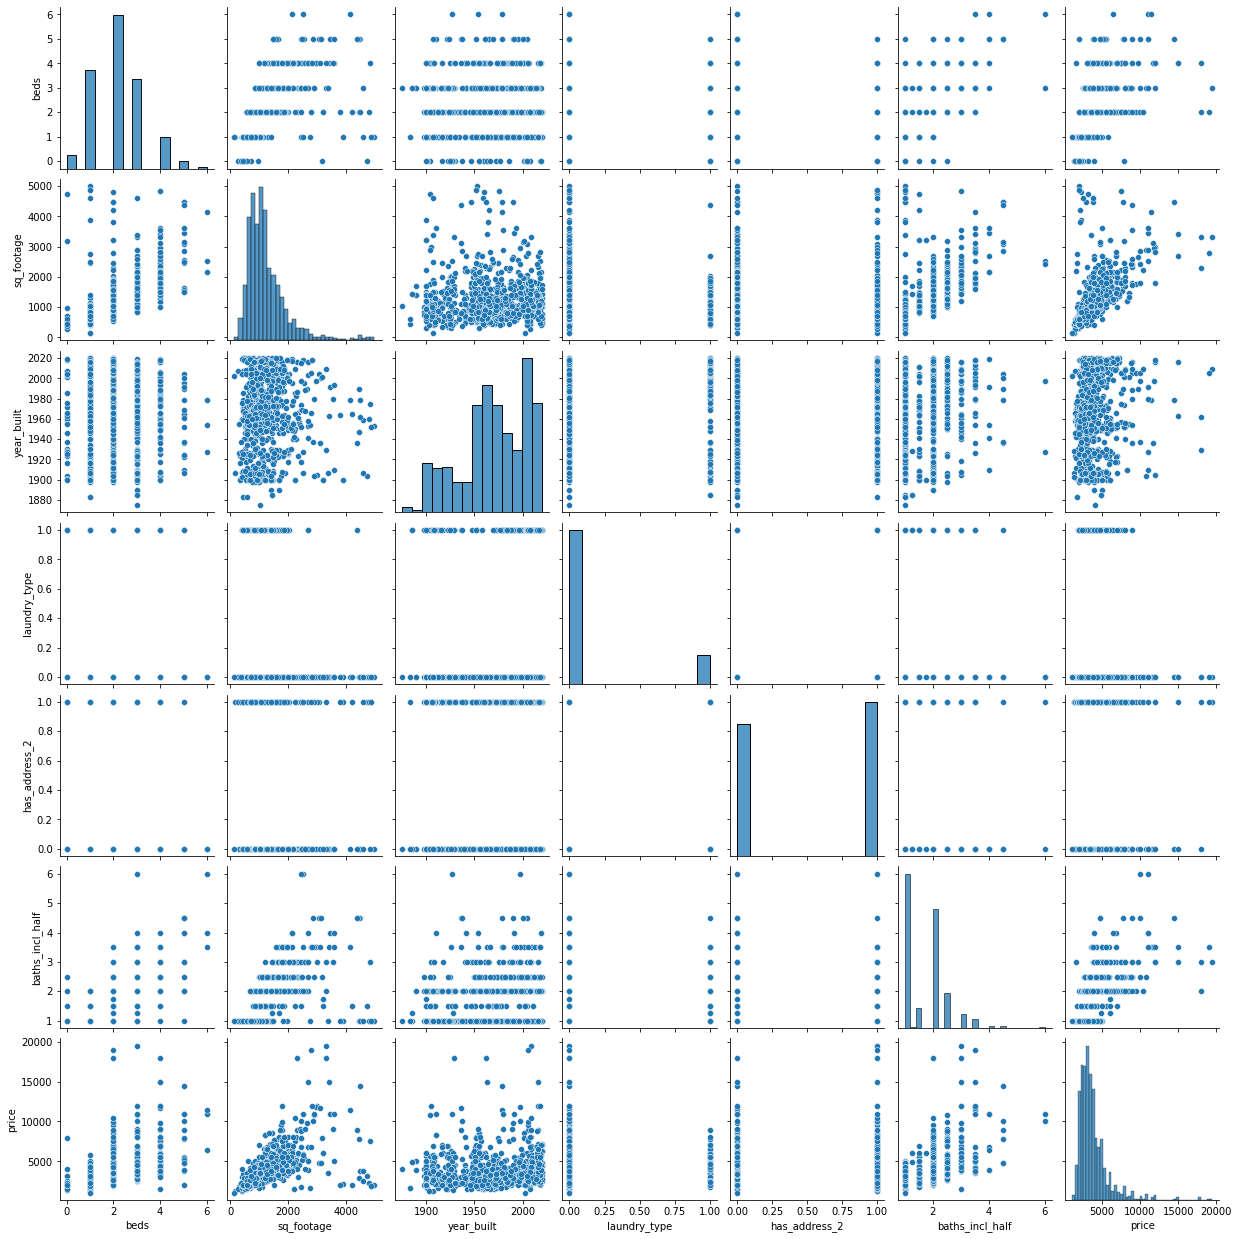

In [37]:
sns.pairplot(num_feats_y)

---

next steps: 
- scraping: get walk score, crime, etc. from walkscore.com
- modeling: try using tranformations, normalization, regularization etc.

---